# Regression Notebook

## Importing packages and defining models

This cell imports the packages needed to run the regression. **No need to edit the cell below, just run it.** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import Model, RealData, ODR
import random

Defining the models we would like to use. **No need to edit the cell below, just run it.** 

In [3]:
# Define a linear to fit the data.
def linear_func(p, x):
     m, b = p
     return m*x + b

# Define a quadratic function to fit the data.
def quad_func(p, x):
     m, b = p
     return m*x**2 + c 

# Choose your model, no need to alter this
MODEL = linear_func

## Data entry

**The cell below is the one you need to edit and run.** Replace `X`, `Y`, `X_ERR`, `Y_ERR` to produce a fit with real data. Replace `X_LABEL` and `Y_LABEL` to set the labes for each variable.

In [4]:
# Axes labels, change these to the appropriate names and don't forget to specify the units
X_LABEL = "distance (cm)"
Y_LABEL = "speed (cm/s)"

# Enter the data
# Replace X, Y, X_ERR, Y_ERR, with your real data, 
# X_ERR and Y_ERR are absolute error in X and Y resepctively
X     = [0, 1, 2, 3, 4, 5]
X_ERR = [.2, .2, .2, .2, .2, .2]
Y     = [0.1, 2.0, 3.9, 6.3, 7.8, 10.2]
Y_ERR = [.4, .4, .4, .4, .4, .4]

for i in ['X', 'Y', 'X_ERR', 'Y_ERR']:
    exec('{0} = np.array({0})'.format(i))

# Checking whether the data you entered has the right lengths
try:
    assert len(X) == len(Y)
    assert len(X) == len(X_ERR)
    assert len(Y) == len(Y_ERR)
except:
    print("data are not all the same length! You must fix for fit to work properly.")
    print("(length X = {0}, length X_ERR = {1}, length Y = {2}, length Y_ERR = {3})".format(len(X), len(X_ERR), len(Y), len(Y_ERR)))
    raise

## Run the regression

The code box below executes the regression, returns the slope, y-intercept, and R^2 value, and generates a plot including the line of best fit. Right click the image generated so save it to your computer (it is in `.PNG` format). **No need to edit the cell below, just run it.** 

slope:	 2.011E+00 +/- 9.969E-02
y-int:	 2.236E-02 +/- 3.018E-01
R^2:	 0.998


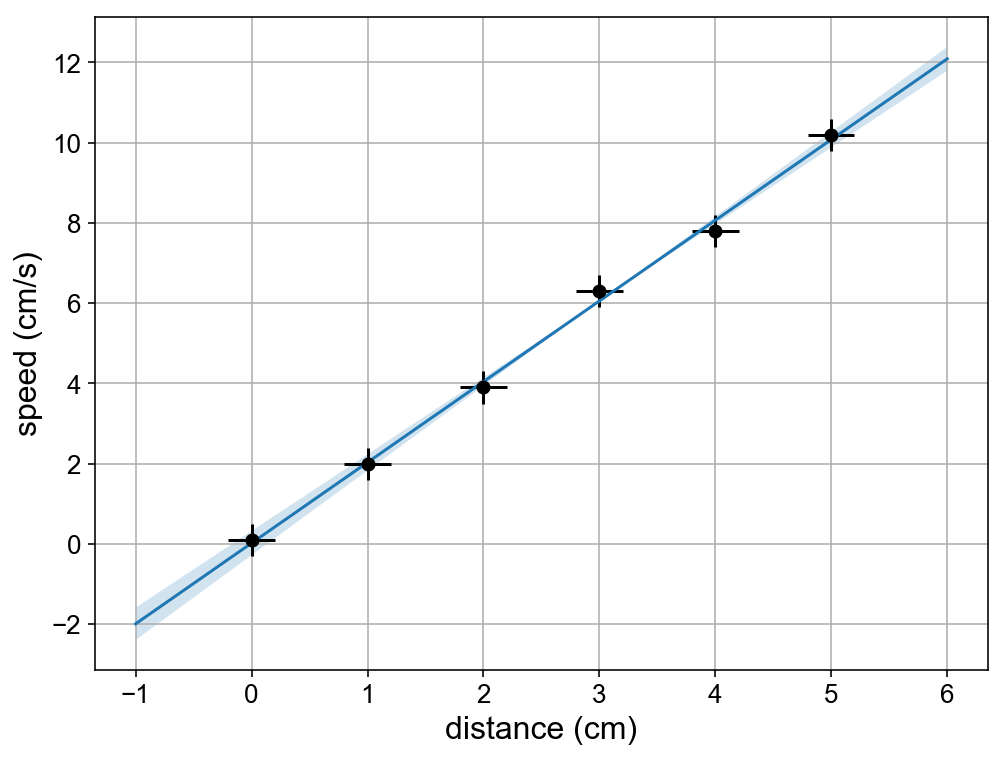

In [5]:
# Create a model for fitting.
my_model = Model(MODEL)

# Create a RealData object using our initiated data from above.
data = RealData(X, Y, sx=X_ERR, sy=Y_ERR)

# Set up ODR with the model and data.
odr = ODR(data, my_model, beta0=[0., 1.])

# Run the regression.
out = odr.run()

# Calculating R value 
SSE = np.sum((Y - MODEL(out.beta, X))**2)
SSTO = np.sum((Y - np.mean(Y))**2)
R2 = 1. - SSE / SSTO

# Use the in-built pprint method to give us results.
# out.pprint()
info = {'m': '{0: .3E} +/- {1:.3E}'.format(out.beta[0], 2*out.sd_beta[0]), 
        'b': '{0: .3E} +/- {1:.3E}'.format(out.beta[1], 2*out.sd_beta[1]),
        'R2': '{0: .3f}'.format(R2)}
print('slope:\t{m}\ny-int:\t{b}\nR^2:\t{R2}'.format(**info))

# Setup the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.tick_params(labelsize = 13)
ax.set_xlabel(X_LABEL, fontsize = 16)
ax.set_ylabel(Y_LABEL, fontsize = 16)

# Plot the data
ax.errorbar(X, Y, xerr=X_ERR, yerr=Y_ERR, linestyle='None', marker='o', color='k')

# Plot the linear fit and 95% confidence interval
x_range = X[-1] - X[0]
x_fit = np.linspace(X[0] - 0.2*x_range, X[-1] + 0.2*x_range, 1000)
y_fit = MODEL(out.beta, x_fit)
y_max = MODEL(out.beta + 2*np.array([out.sd_beta[0], -out.sd_beta[1]]), x_fit)
y_min = MODEL(out.beta - 2*np.array([out.sd_beta[0], -out.sd_beta[1]]), x_fit)
ax.plot(x_fit, y_fit)
ax.fill_between(x_fit, y_min, y_max, alpha=.2)

plt.show()

Right click on the image above to save it to your computer. It is in `.PNG` format. 